In [ ]:
import numpy as np
import cv2
import os

importanto as bibliotecas necessárias para o funcionamento do código.

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('Arquivo carregador("name") com tamanho de (length) bytes'.format(name=fn, length=len(uploaded[fn])))

Saving Sem título.png to Sem título.png
Arquivo carregador("name") com tamanho de (length) bytes


aqui importa a imagem diretamente do google colab.

In [ ]:
filename = next(iter(uploaded))
print(filename)

Sem título.png


aqui guarda a imagem e mostra o nome dela.

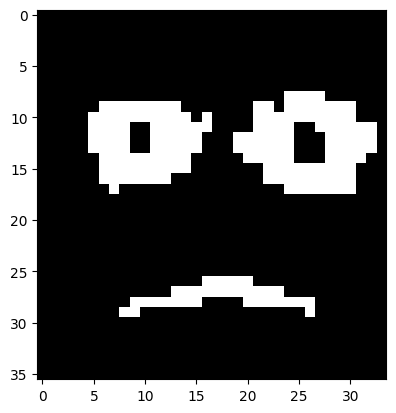

In [ ]:
from matplotlib import pyplot as plt
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

aqui apresenta a imagem original, selecionei uma imagem pequena para melhor visualização.

In [ ]:
threshold = 127
img_binaria = np.where(img > threshold, 1, 0)

aqui transforma a imagem em binaria.

In [ ]:
x = img_binaria.shape[0]
y = img_binaria.shape[1]

img1 = np.zeros((x, y), dtype=np.uint8)
for a in range(0, x-1):
    for b in range(0, y-1):
        dilatacao = 0
        img_vetor = [img_binaria[a, b], img_binaria[a+1, b], img_binaria[a, b+1], img_binaria[a+1, b+1]]
        for valor in img_vetor:
            if valor == 1:
                dilatacao = 1
        img1[a, b] = dilatacao

aqui é onde acontece a dilatação binária

In [ ]:
x = img_binaria.shape[0]
y = img_binaria.shape[1]

img2 = np.zeros((x, y), dtype=np.uint8)
for a in range(0, x-1):
    for b in range(0, y-1):
        erosao = 1
        img_vetor = [img_binaria[a, b], img_binaria[a+1, b], img_binaria[a, b+1], img_binaria[a+1, b+1]]
        for valor in img_vetor:
            if valor == 0:
                erosao = 0
        img2[a, b] = erosao

e aqui é onde acontece a erosão binária

In [ ]:
img3 = np.zeros((x, y), dtype=np.uint8)
for a in range(0, x-1):
    for b in range(0, y-1):
        erosao = 1
        img_vetor = [img_binaria[a, b], img_binaria[a+1, b], img_binaria[a, b+1], img_binaria[a+1, b+1]]
        for valor in img_vetor:
            if valor == 0:
                erosao = 0
        img3[a, b] = erosao

img4 = np.zeros((x, y), dtype=np.uint8)
for a in range(0, x-1):
    for b in range(0, y-1):
        dilatacao = 0
        img_vetor = [img3[a, b], img3[a+1, b], img3[a, b+1], img3[a+1, b+1]]
        for valor in img_vetor:
            if valor == 1:
                dilatacao = 1
        img4[a, b] = dilatacao

aqui aplica a abertura, que é a erosão + dilatação

In [ ]:
img5 = np.zeros((x, y), dtype=np.uint8)
for a in range(0, x-1):
    for b in range(0, y-1):
        dilatacao = 0
        img_vetor = [img_binaria[a, b], img_binaria[a+1, b], img_binaria[a, b+1], img_binaria[a+1, b+1]]
        for valor in img_vetor:
            if valor == 1:
                dilatacao = 1
        img5[a, b] = dilatacao

img6 = np.zeros((x, y), dtype=np.uint8)
for a in range(0, x-1):
    for b in range(0, y-1):
        erosao = 1
        img_vetor = [img5[a, b], img5[a+1, b], img5[a, b+1], img5[a+1, b+1]]
        for valor in img_vetor:
            if valor == 0:
                erosao = 0
        img6[a, b] = erosao

e aqui aplica o fechamento, que é a dilatação + erosão

(-0.5, 33.5, 35.5, -0.5)

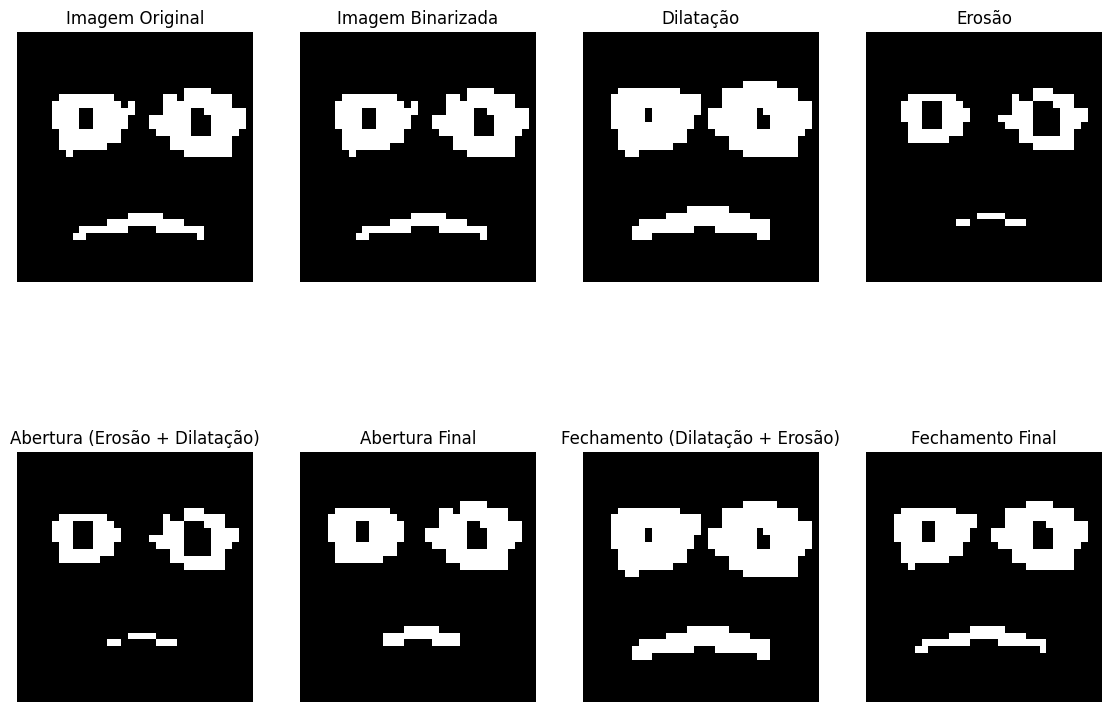

In [ ]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 4, 1)
plt.imshow(img * 255, cmap='gray')
plt.title("Imagem Original")
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(img_binaria * 255, cmap='gray')
plt.title("Imagem Binarizada")
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(img1 * 255, cmap='gray')
plt.title("Dilatação")
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(img2 * 255, cmap='gray')
plt.title("Erosão")
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(img3 * 255, cmap='gray')
plt.title("Abertura (Erosão + Dilatação)")
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(img4 * 255, cmap='gray')
plt.title("Abertura Final")
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(img5 * 255, cmap='gray')
plt.title("Fechamento (Dilatação + Erosão)")
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(img6 * 255, cmap='gray')
plt.title("Fechamento Final")
plt.axis('off')

aqui apresenta as imagens e os seus devidos resultados.